<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 10 day 2</div>
<div style="text-align: right">Dino Konstantopoulos, 20 November 2019</div>

# The Winnow

Let's work with a very simple ANN: One consisting of three layers: 2 **hidden** ones with 10 neurons each, and a single-neuron input and a single-neuron output. Then, let's revisit the **Winnow algorithm** with an **ensemble** methodology.

## 1. Autoencoders with `Keras`

Excting! We're going to start with `Keras` today, which is the main API behind `TensorFlow 2.0`. I've used `Keras` when it was still a baby, before anyone was saying anything about it, let alone the tensorflow team at Google.

This is a single neuron in your brain. Pretty huh? Imagine is talking (we heard a recording of many neurons chirping together last lecture):

<br />
<center>
<img src =ipynb.images/neuron1.png width = 400 />
</center>


And this is the artificial equivalent, with many inputs coming in from neighboring neurons. The bias is always there, independent of what the inputs are. The bias represents the neuron's ***learning experience***. After the **activation function** gets applied, the output goes to downstream neurons in the next layer.

<br />
<center>
<img src =ipynb.images/neuron-many.png width = 400 />
</center>

The **activation function** is a non-linear sigmoidal function that transforms the electrochemical **input** potential to a different **output** potential. It is this **non-linearity** that produces the powerful model building capability for networks of neurons. Examples are CNNs, RNNs, and LSTM networks. However, we know based on our **Winnow** experience that even **linear** activation functions can produce effective learning models for simple datasets.

### A 2-layer model

In our two layer model, with 10 neurons in each layers, and a total of 10 + 100 + 10 = 120 connections, we were able to autoencode a noisy sine function. 

<br />
<center>
<img src =ipynb.images/neurons-10-10.png width = 150 />
</center>

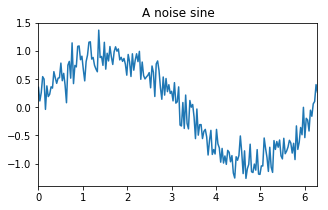

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
x = np.linspace(0, 2 * math.pi, 200)
sine = np.sin(x)
err = np.random.normal(0, 0.2, len(sine))
y = sine + err
plt.figure(figsize=(5, 3))
plt.plot(x, y)
plt.xlim([0, 2 * math.pi])
plt.title('A noise sine')
plt.show()

In [2]:
len(y)

200

What this means is that we compressed the 200 datapoints resulting from a noisy sine function to a number of weights, by training our neural net. A keras `Dense` layer is really a *sandwich* of two **layers**:

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

n_conn = 10
model = Sequential()
model.add(Dense(output_dim=n_conn, input_dim=1)) #from 1 to 10
model.add(Activation("relu"))
model.add(Dense(output_dim=n_conn)) #from 10 to 10
model.add(Activation("relu"))
model.add(Dense(output_dim=1)) #from 10 to 1
model.compile(loss='mean_squared_error', optimizer='sgd')

X_train = np.array(x, ndmin=2).T
Y_train = np.array(y, ndmin=2).T

model.fit(X_train,
          Y_train,
          nb_epoch=5000,
          verbose=0,
          callbacks=[])

d:\Anaconda3.5.1\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=10)`
  
d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10)`
  
d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  # Remove the CWD from sys.path while we load stuff.
d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:20: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


How many information layers in our neural net?

<br />
<center>
<img src =ipynb.images/neuron-5layers.png width = 150 />
</center>

In [4]:
np.shape(model.layers)

(5,)

How many weights in total?

In [5]:
weights = model.layers[0].get_weights()
weights

[array([[ 0.07558671, -0.02731602,  0.56138307, -0.36878344,  0.10805937,
         -0.44050014, -0.5521841 ,  0.30822212,  0.7508774 ,  0.4316021 ]],
       dtype=float32),
 array([ 6.4156318e-01, -6.9355301e-06, -5.2596337e-01, -8.9821478e-06,
         6.0990065e-01, -3.0197665e-05, -4.3725966e-05, -7.8251049e-02,
        -1.3609480e+00,  5.2223366e-01], dtype=float32)]

In [6]:
weights = model.layers[1].get_weights()
weights

[]

In [7]:
weights = model.layers[2].get_weights()
weights

[array([[-0.30330205,  0.14495201,  0.3118862 ,  0.45895725, -0.08304461,
         -0.6304284 , -0.19051902,  0.17893852, -0.2843512 ,  0.20973974],
        [-0.4584059 , -0.4557514 ,  0.08840276,  0.5015261 , -0.42041102,
          0.24514784,  0.16964209,  0.5287002 , -0.09905362, -0.43667072],
        [-0.25561795, -0.14615585,  0.28554448, -0.49693623,  0.09481683,
          0.4911677 , -0.30012536, -0.1621637 ,  0.16567671,  0.5097417 ],
        [ 0.21061802, -0.452083  ,  0.43860346, -0.22990361,  0.04520132,
         -0.4112595 , -0.18610354,  0.35950506,  0.48901695, -0.22948715],
        [-0.3685887 , -0.20687127, -0.3405207 ,  0.17285463,  0.59805703,
         -0.4178629 , -0.34061575, -0.05700661, -0.42839903, -0.02827919],
        [ 0.17112249, -0.21771677, -0.06919834,  0.3919421 ,  0.50938046,
          0.49181682,  0.22317803,  0.07711881, -0.06585511,  0.05968007],
        [ 0.45967752,  0.18730597, -0.02083023, -0.3213762 ,  0.24905762,
         -0.54664415, -0.2595555

In [8]:
weights = model.layers[3].get_weights()
weights

[]

In [9]:
weights = model.layers[4].get_weights()
weights

[array([[ 0.39283648],
        [ 0.22326359],
        [ 0.39553687],
        [ 1.4749285 ],
        [-1.0500176 ],
        [ 1.2764152 ],
        [ 0.30588096],
        [ 0.7096248 ],
        [ 0.66661406],
        [ 0.34936446]], dtype=float32), array([-1.7696104], dtype=float32)]

120 total weights! So we compressed 200 data points to 120 datapoints by building a lower-dimensional model (the neural net), which yields approximately the same data:

<br />
<center>
<img src =ipynb.images/2layers.png width = 400 />
</center>

This is not different with the dimensionality reduction we accomplished in previous lectures where we modelled datasets as random variates from pdfs like the *gaussian, beta, gamma,* etc. By the way, our data compression rate in that case was much more dramatic as a gaussian takes only **two** parameters (mean and standard deviation), and can be a generative model for**huge** datasets!

Our neural net is an example of an **autoencoder** because it encodes our original signal, in a lower dimensional space.

We also used keras to build a CNN to classify images, and you can use professor's trained weights to figure out the data compression rate over 32 x 32 images. However, our CNN was not exactly an autoencoder, it is a classifier that classifies images in bins of cat, dog, bird, etc. 

## 2. The Winnow

Back to the simplest kind of learning network: The **Winnow**. And a different dataset.

>**Winnowing** in english means to "remove unwanted items*. It comes to us from [agriculture](https://en.wikipedia.org/wiki/Winnowing). In its simplest form in agriculture, it involves throwing a mixture into the air so that the wind blows away the lighter chaff (junk), while the heavier grains fall back down for recovery.

We're going to train a binary classifier based on binary features by throwing away bad training results. That's the basic winnowing algorithm. Our goal is to predict one of two states on a collection of features. 

>**STATE**:To predict the state of an observation, check all the features that are *active* (true, or detected in an observation) and sum up the weights assigned to these features. If the total is above a certain threshold, the result is true, otherwise it’s false.

The learning process feeds examples (observations with known labels) and progressively updates the weights ***when the model makes mistakes***. If the current model predicts the output correctly, ***don’t change anything***! If it predicts true but should predict false, it is over-shooting, so weights that were used in the prediction (i.e. weights attached to *active* features) are reduced (by half). Conversely, if the prediction is false but the correct result should be true, the active features are not used enough to reach the threshold, so they should be bumped up (doubled).


This is the algorithm:

Initialize: weights $w_1 = w_2 = \cdots = w_n=1$

Iterate:

Receive an example vector $x = {x_1, x_2, \cdots x_n}$, with its label (true or false).

Predict: 
Output 1 if …, 0 otherwise.

Then, check the label.

Update weights *only if making a mistake*:
- False-positive error:  for each $x_i = 1$:	$w_i = 2*w_i$
- False-negative error: for each $x_i = 0$:	$w_i = \frac{w_i}{2} $


In other words:

```python
initialize weights
for each epoch:
  for each training item X:
    compute Y
    if correct (Y == label) do nothing
    else if incorrect:
      if computed Y is too large:
        divide all relevant weights by 2.0
      else if computed Y is too small:
        multiply all relevant weights by 2.0
```

The algorithm starts with arbitrary initial weights of 1 for every feature.

This is the **training process** (expressed in the cool language [F#](https://fsharp.org/) (*if you like being lazy because you can do a lot of programming by writing little code in python, it gets even better with functional languages like F#!*): Either double or halve the weights based on mistakes made:

```python
let update (theta:float) (alpha:float) (w:Weights) (ex:Example) =
	let real,obs = ex
	match (real,predict theta w obs) with
	| (true,false) -> w |> Array.mapi (fun i x -> if obs.[i] then alpha * x else x)
	| (false,true) -> w |> Array.mapi (fun i x -> if obs.[i] then x / alpha else x)
	| _ -> w
```

And this is the **prediction function**, which takes in theta (the threshold), weight array, and an observation (features) array. Zip together the features and the weights, exclude the pairs where the feature is not active, sum the weights, and check whether the threshold is lower that the total:
```python
type Observation = bool []
type Label = bool
type Example = Label * Observation
type Weights = float []
 
let predict (theta:float) (w:Weights) (obs:Observation) =
	(obs,w) ||> Seq.zip
	|> Seq.filter fst
	|> Seq.sumBy snd
	|> ((<) theta)
```

The algorithm essentially drives the weights of irrelevant predictors to 0, *winnowing them out*. This makes Winnow classification effective in situations where many of the predictor variables are irrelevant (frivolous). Simple, right? :-)

>**ANALOGY**: It's like you have an army of lieutenants, each of whose advice you heed. You train them with theoretical situations that you know the result of. If the total voice of all lieutenants is correct, do nothing. if it's wrong, the lieutenants that were right get their voices doubled, the ones that were wrong get their voices halved. In the end, the lieutenant's total vocal output should yield the correct result. The activation function is totally linear!

>**DEEP LEARNING IN A NUTSHELL**: Machine Learing with Deep Learning (DL) algorithms is not much different in methodology. The modeling power of DL is much higher due to the artificial neuron’s inherent non-linearities. But the methodology is similar: 
Train model with feature observations in order to refine weights (synapse strength), use a guiding algorithm (e.g. stochastic gradient descent), and an error metric (e.g. root mean square). Once weights are determined, reuse them for any other observation with similar features. Most of the DL research in the last 20 years was about how to update the weights in training, whether to use a greedy model or not, which activation function to pick, how many layers and neurons per layer, and how to connect the neurons.

## 3. Lab: Winnow on MNIST

Let's download the database of MNIST digits from [here](http://yann.lecun.com/exdb/mnist/).

<br />
<center>
<img src =ipynb.images/mnistexamples.png width = 400 />
</center>

I already downloaded these, uncompressed them, and put them on blackboard.
 
The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. The images are centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

This is how we measure success, for each digit:

In [10]:
def calculate_macro_f1_score(predictions, true_labels):
    true_positives = [0 for i in range(10)]
    false_positives = [0 for i in range(10)]
    false_negatives = [0 for i in range(10)]

    if len(predictions) != len(true_labels):
        print("bug in code, length of predictions should match length of true_labels")
        return None
    for i in range(len(predictions)):
        if predictions[i] == true_labels[i]:
            true_positives[predictions[i]] += 1
        else:
            false_positives[predictions[i]] += 1 #if predictions[100] = 5 and true_labels[100] = 9, then 5 was over-predicted 
            false_negatives[true_labels[i]] += 1 #... and 9 under-predicted

    total_classes = 0
    total_f1 = 0
    for i in range(10):
        if (true_positives[i]==0 and false_positives[i]==0):
            continue
        elif (true_positives[i]==0 and false_negatives[i]==0):
            continue
        prec = true_positives[i]*1.0/(true_positives[i] + false_positives[i])
        recall = true_positives[i]*1.0/(true_positives[i]+false_negatives[i])
        f1=0
        if prec+recall != 0:
            f1 = 2*prec*recall/(prec+recall)
        total_classes += 1
        total_f1 += f1
    return total_f1*100.0/total_classes

This is how we transform the data into numpy arrays:

In [17]:
import numpy as np
import struct

def read_file(filename):
    with open(filename,'rb') as fp:
        zero, data_type, dims = struct.unpack('>HBB', fp.read(4))
        shape = tuple(struct.unpack('>I', fp.read(4))[0] for d in range(dims))
        np_array = np.frombuffer(fp.read(), dtype=np.uint8).reshape(shape)
    return np_array

Each digit in MNIST is represented as a 28x28 dimensional vector, each cell having a value in the range \[0,255\]. 

We scale each data value to be 0 or 1 (we divide each cell value by 255 and round). We make the 2D vector into a 1D vector of size 28x28 = 784. This is a stadard procedure in image deep learning.

We take the bias term and pass the input value 1 for that feature. So in total we have a 785 dimensional feature space. 

There are 60k traiing examples and 10k test examples. We will use the first 10k images in the training set for training, and all the images in the test set for testing. 

We should shuffle the training examples before training, we shuffle in training.

In [18]:
def preprocess(image_file, label_file):
    images = read_file(image_file)
    labels = read_file(label_file)
    if (len(labels) > 10000):
        labels = labels[:10000]
        images = images[:10000]
    flag_array = images > 128
    images.setflags(write=1)
    
    images[flag_array]=1
    images[~flag_array]=0
    images = images.reshape( (10000, 784))

    labels = labels.reshape(-1,1)
    data = np.concatenate((images, labels), axis=1)
#     np.random.shuffle(data)
    return data

Some utility functions. `get_true_label` is a 0-9 discriminator.

In [19]:
def get_true_label(digit, perceptron_type):
    if digit == perceptron_type:
        return 1
    return -1

`get_features_labels` appends labels to the data, for convenience:

In [20]:
def get_features_labels(data, bias):
    examples = data[:,:-1]
    labels = data[:,-1]
    examples = np.append(examples, bias, 1)
    return examples, labels

`inference()` predicts the digit from the data:

In [21]:
def inference(test_data, weights):
    data_size = len(test_data)
    bias = np.ones((data_size,1))
    examples, labels = get_features_labels(test_data, bias)
    prediction = np.ones(data_size, dtype = int)
    correct = 0
    for i, example in enumerate(examples):
        activation_values = np.sum(weights*example, axis = 1)
        prediction[i] = np.argmax(activation_values)
        if prediction[i] == labels[i]:
            correct += 1
#     print correct*1.0/data_size*100
    return prediction, labels

`get_f1_score()` scores our results:

In [22]:
def get_f1_score(test_data, weights):
    prediction, true_labels = inference(test_data, weights)
    f1_score = calculate_macro_f1_score(prediction, true_labels)
    return f1_score

`train_winnow()` is our Winnow implementation:

In [23]:
def train_winnow(train_data, num_epoches, factor, theta):
    data_size = len(train_data)
    # weights = np.ones((10,785))
    '''
    initialize weights for all 10 winnows randomly
    ''' 
    weights = np.random.uniform(0.1,1,[10,785])

    average_weights = np.zeros((10,785))
    bias = np.ones((data_size,1))
    for epoch in range(num_epoches):
        np.random.shuffle(train_data)
        examples, labels = get_features_labels(train_data, bias)
        for i,example in enumerate(examples):
            y_pred = np.sum(weights*example, axis = 1)
            for j in range(0,10):
                label = get_true_label(labels[i], j)
                if label == 1 and y_pred[j] < theta:
                    weights[j][example == 1] *= factor
                elif label == -1 and y_pred[j] >= theta:
                    weights[j][example == 1] /= factor
            average_weights += weights    
    return weights, average_weights           


Let's preprocess the data to stay in a 2D plane:

In [24]:
train_data_size = 10000
epochs = 50
factor = 1.2 #less dramatic update than a factor of 2
theta = 785
path = 'data'

train_data = preprocess(path + '/train-images.idx3-ubyte', path + '/train-labels.idx1-ubyte')
test_data = preprocess(path + '/t10k-images.idx3-ubyte', path + '/t10k-labels.idx1-ubyte')

Let's train 10 Winnows!

In [26]:
from tqdm import tqdm, trange
for i in tqdm(range(10)):
    np.random.shuffle(train_data)
    weights, avg_weights = train_winnow(train_data[:train_data_size], epochs, factor, theta)

Let's see how we did by comparing predictions with labels, on both the training and the test datasets:

In [27]:
f1_score_train = get_f1_score(train_data[:train_data_size], weights)
f1_score_test = get_f1_score(test_data, weights)

print("Training F1 Score: ", f1_score_train)
print("Test F1 Score: ", f1_score_test)

Training F1 Score:  60.96223673178813
Test F1 Score:  57.32969224708167


The training score is not that great... But MNIST is a big dataset, and we do have a simple linear activation function after all..